<a href="https://colab.research.google.com/github/dkusarfa/UST-Internship/blob/main/Hydrogen_Compatibility_of_Materials.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#RECOMENDATION SYSTEM
##### A recomendation system implimented based on the available datasets. A material is recommended for use to the user based on its required parameters and limiting values. the fatigue graph is also provided if the material suggested is metal based.

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.svm import SVR

In [ ]:
def import_csvs_from_directory(directory):
    csv_files = [file for file in os.listdir(directory) if file.endswith('.csv')]
    dataframes = []
    for file in csv_files:
        path = os.path.join(directory, file)
        df = None
        encodings = ['utf-8', 'latin1']
        for encoding in encodings:
            try:
                df = pd.read_csv(path, encoding=encoding)
                break
            except UnicodeDecodeError:
                continue
        if df is not None:
            dataframes.append(df)
    return dataframes

In [ ]:
def draw_graph(csv_directory, csv_path):
    if csv_path.endswith('.csv'):
        path = os.path.join(csv_directory, csv_path)
        df = pd.read_csv(path)
        x = df['∆K_2']
        y = df['da/dN_1']
        plt.plot(x, y)
        plt.xlabel('Stress intensity factor')
        plt.ylabel('Fatigue crack growth')
        plt.title('fatigue Graph of the material')
        plt.show()
    else:
        print("No graph available.")

In [ ]:
def search_parameter(dataframes, parameter, limiting_value, csv_directory):
    results = []
    for df in dataframes:
        if parameter in df.columns:
            column_data = df[parameter]
            filtered_data = column_data[column_data <= limiting_value]
            if not filtered_data.empty:
                max_row_value = filtered_data.max()
                max_row = df[column_data == max_row_value].iloc[0]
                max_row['NumLimitingValues'] = sum(column_data <= limiting_value)
                if 'fatigue_csv' in df.columns:
                    max_row['CSV_Path'] = df['fatigue_csv'].iloc[0]
                    for result in max_row:
                        csv_path = result['fatigue_csv']
                        draw_graph(csv_directory, csv_path)
                else:
                    max_row = df[column_data == max_row_value].iloc[0]
                    max_row['CSV_Path'] = 'N/A'
                max_row['NumLimitingValues'] = sum(column_data <= limiting_value)
                if 'fatigue_csv' in max_row.index:
                    max_row = max_row.drop('fatigue_csv')
                results.append(max_row)
    return results

In [ ]:
def main(csv_directory):
    dataframes = import_csvs_from_directory(csv_directory)
    parameters = []
    limiting_values = []

    print("Enter parameters and corresponding limiting values (Enter 0 to stop):")
    while True:
        parameter = input("Parameter: ")
        if parameter == '0':
            break
        limiting_value = float(input("Limiting value: "))
        parameters.append(parameter)
        limiting_values.append(limiting_value)
    results = []
    for parameter, limiting_value in zip(parameters, limiting_values):
        parameter_results = search_parameter(dataframes, parameter, limiting_value,csv_directory)
        results.extend(parameter_results)

    print("the material which satisfies all the limiting conditions the most is\n")
    print(results)

if __name__ == '__main__':
    csv_directory = '/content/drive/MyDrive/materials'
    main(csv_directory)

Enter parameters and corresponding limiting values (Enter 0 to stop):
Parameter: excess_h_weight_experiment_percent
Limiting value: 1
Parameter: excess_h_weight_temperature
Limiting value: 300
Parameter: excess_h_weight_pressure
Limiting value: 12
Parameter: 0
the material which satisfies all the limiting conditions the most is

[material_name                         Activated carbon, Ni/AX-21
chemical_formula                                          C + Ni
excess_h_weight_experiment_percent                           1.0
excess_h_weight_temperature                                  298
excess_h_weight_pressure                                    10.0
CSV_Path                                                     N/A
NumLimitingValues                                             15
Name: 7, dtype: object, material_name                         Activated carbon, Ni/AX-21
chemical_formula                                          C + Ni
excess_h_weight_experiment_percent                         

####Example for material being suggested being a steel based material

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.svm import SVR

In [ ]:
def import_csvs_from_directory(directory):
    csv_files = [file for file in os.listdir(directory) if file.endswith('.csv')]
    dataframes = []
    for file in csv_files:
        path = os.path.join(directory, file)
        df = None
        encodings = ['utf-8', 'latin1']
        for encoding in encodings:
            try:
                df = pd.read_csv(path, encoding=encoding)
                break
            except UnicodeDecodeError:
                continue
        if df is not None:
            dataframes.append(df)
    return dataframes

In [ ]:
def draw_graph(csv_directory, csv_path):
    if csv_path.endswith('.csv'):
        path = os.path.join(csv_directory, csv_path)
        df = pd.read_csv(path)
        x = df['∆K_2']
        y = df['da/dN_1']
        plt.plot(x, y)
        plt.xlabel('Stress intensity factor')
        plt.ylabel('Fatigue crack growth')
        plt.title('fatigue Graph of the material')
        plt.show()
    else:
        print("No graph available.")

In [ ]:
def search_parameter(dataframes, parameter, limiting_value, csv_directory):
    results = []
    for df in dataframes:
        if parameter in df.columns:
            column_data = df[parameter]
            filtered_data = column_data[column_data <= limiting_value]
            if not filtered_data.empty:
                max_row_value = filtered_data.max()
                max_row = df[column_data == max_row_value].iloc[0].copy()
                if 'fatigue_csv' in df.columns:
                    max_row['CSV_Path'] = df['fatigue_csv'].iloc[0]
                    csv_path = max_row['CSV_Path']
                    draw_graph(csv_directory, csv_path)
                else:
                    max_row['CSV_Path'] = 'N/A'
                max_row['NumLimitingValues'] = sum(column_data <= limiting_value)
                if 'fatigue_csv' in max_row.index:
                    max_row = max_row.drop('fatigue_csv')
                results.append(max_row)
    return results

Enter parameters and corresponding limiting values (Enter 0 to stop):
Parameter: pressure
Limiting value: 49
Parameter: energy_density
Limiting value: 17
Parameter: fracture_toughness
Limiting value: 64
Parameter: 0


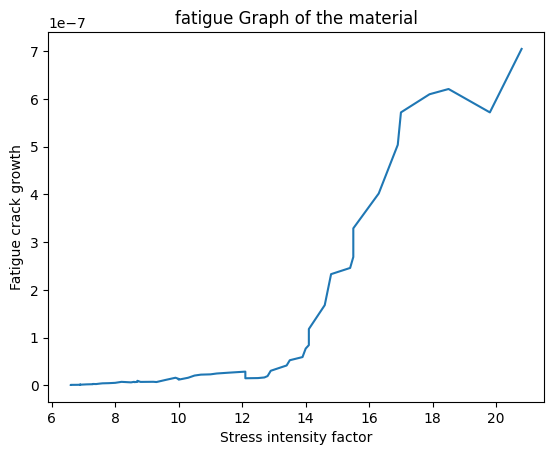

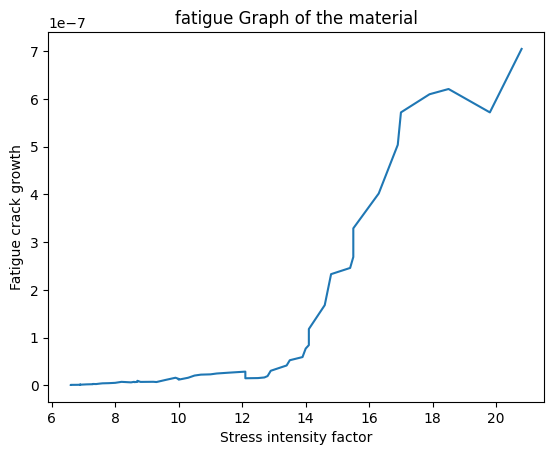

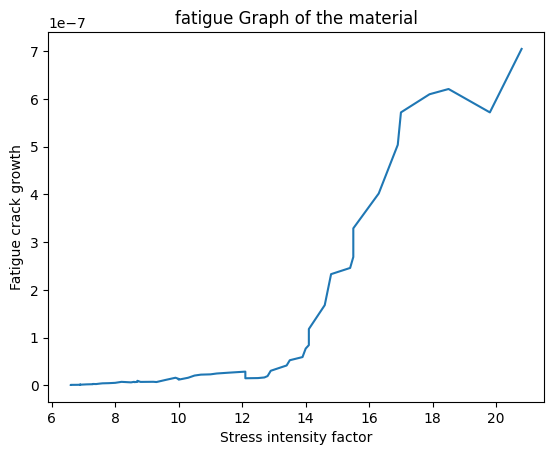

the material which satisfies all the limiting conditions the most is

[Sample_Name                                  4130X(tempered martensite)
pressure                                                           45.0
energy_density                                                     15.5
fracture_toughness                                                   59
h1                                                                    6
CSV_Path              /content/drive/MyDrive/materials/graphs/X42_fa...
NumLimitingValues                                                     5
Name: 5, dtype: object, Sample_Name                                  4130X(tempered martensite)
pressure                                                           45.0
energy_density                                                     15.5
fracture_toughness                                                   59
h1                                                                    6
CSV_Path              /content/drive/MyDr

In [ ]:
def main(csv_directory):
    dataframes = import_csvs_from_directory(csv_directory)
    parameters = []
    limiting_values = []

    print("Enter parameters and corresponding limiting values (Enter 0 to stop):")
    while True:
        parameter = input("Parameter: ")
        if parameter == '0':
            break
        limiting_value = float(input("Limiting value: "))
        parameters.append(parameter)
        limiting_values.append(limiting_value)
    results = []
    for parameter, limiting_value in zip(parameters, limiting_values):
        parameter_results = search_parameter(dataframes, parameter, limiting_value,csv_directory)
        results.extend(parameter_results)

    print("the material which satisfies all the limiting conditions the most is\n")
    print(results)

if __name__ == '__main__':
    csv_directory = '/content/drive/MyDrive/materials'
    main(csv_directory)

# #2 To predict a series of materials with possible combinations of properties
###### With the database available, a series of materials or combinations of materials could be predicted having necessary properties to store hydrogen.

#### USING SUPPORT VECTOR MACHINES(SVM)

## USING SUPPORT VECTOR MACHINES(SVM)

In [ ]:
import pandas as pd
import os
from itertools import combinations
from sklearn.svm import SVR

In [ ]:
def import_csvs_from_directory(directory):
    csv_files = [file for file in os.listdir(directory) if file.endswith('.csv')]
    dataframes = []
    for file in csv_files:
        path = os.path.join(directory, file)
        try:
            df = pd.read_csv(path, encoding='utf-8')
        except UnicodeDecodeError:
            try:
                df = pd.read_csv(path, encoding='latin-1')
            except UnicodeDecodeError:
                print(f"Error reading CSV file: {file}. Skipping...")
                continue
        dataframes.append(df)
    return dataframes

In [ ]:
def generate_combinations(df):
    combinations_list = []
    for r in range(2, len(df)+1):
        combinations_list.extend(list(combinations(df.index, r)))
    return combinations_list

In [ ]:
def predict_combinations(df):
    combinations_list = generate_combinations(df)
    predictions = []
    for combination in combinations_list:
        subset = df.iloc[list(combination)]
        X = subset.drop(columns=['Target'])
        y = subset['Target']
        model = SVR()
        model.fit(X, y)
        prediction = model.predict(X)
        predictions.append(prediction)
    return predictions

In [ ]:
csv_directory = '/content/drive/MyDrive/materials/graphs'
dataframes = import_csvs_from_directory(csv_directory)

In [ ]:
required_csv = input("Enter the name of the required CSV file (without the extension): ")
required_df = None
for df in dataframes:
    if required_csv in df.columns:
        required_df = df
        break

Enter the name of the required CSV file (without the extension): 4130X_fatigue


In [ ]:
if required_df is not None:
    predictions = predict_combinations(required_df)


    for prediction in predictions:
        print(prediction)
else:
    print("Required CSV file not found.")

Required CSV file not found.


## K-Nearest Neighbors (KNN) algorithm

In [ ]:
import pandas as pd
import os
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

In [ ]:
def import_csvs_from_directory(directory, encodings=['utf-8', 'ISO-8859-1', 'latin-1']):
    csv_files = [file for file in os.listdir(directory) if file.endswith('.csv')]
    dataframes = {}

    for file in csv_files:
        path = os.path.join(directory, file)

        for encoding in encodings:
            try:
                df = pd.read_csv(path, encoding=encoding)
                dataframes[file] = df
                break
            except UnicodeDecodeError:
                continue

    return dataframes

In [ ]:
def get_user_input(dataframes):
    print("Available CSV files:")
    for class_name in dataframes.keys():
        print(class_name)

    required_csv = input("Enter the name of the required CSV file (without the extension): ").lower()
    return required_csv

In [ ]:
def encode_categorical_columns(dataframes):
    for df in dataframes.values():
        categorical_cols = df.select_dtypes(include=['object']).columns
        if len(categorical_cols) > 0:
            encoder = LabelEncoder()
            for col in categorical_cols:
                df[col] = encoder.fit_transform(df[col])
    return dataframes

In [ ]:
def predict_new_materials(dataframes, required_csv):
    required_df = dataframes.get(required_csv)
    if required_df is not None:
        X = required_df.drop(columns=[required_csv])
        y = required_df[required_csv]

        knn_model = KNeighborsClassifier(n_neighbors=3)
        knn_model.fit(X, y)

        new_data = X.iloc[[0]]
        predicted_materials = knn_model.predict(new_data)
        print("Predicted materials based on the first row of the required CSV:")
        print(predicted_materials)
    else:
        print("Required CSV file not found.")

In [ ]:
if __name__ == "__main__":
    csv_directory = '/content/drive/MyDrive/materials'
    dataframes = import_csvs_from_directory(csv_directory)
    dataframes = encode_categorical_columns(dataframes)

    required_csv = get_user_input(dataframes)
    predict_new_materials(dataframes, required_csv)

Available CSV files:
Polymer.csv
chemicals.csv
Class.csv
hydrides.csv
Adsorbants.csv
Copper.csv
Specialty Steels.csv
materials_datasets.csv
Enter the name of the required CSV file (without the extension): Adsorbants
Required CSV file not found.


## Decision Trees and Random Forests approach

In [ ]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [ ]:
def import_csvs_from_directory(directory, encodings=['utf-8', 'ISO-8859-1']):
    csv_files = [file for file in os.listdir(directory) if file.endswith('.csv')]
    dataframes = {}
    for file in csv_files:
        class_name = file.split('.')[0]  # Extract class name from the CSV filename
        path = os.path.join(directory, file)
        df = None
        for encoding in encodings:
            try:
                df = pd.read_csv(path, encoding=encoding)
                break  # If successful, break the loop and proceed to the next CSV file
            except UnicodeDecodeError:
                continue  # Try the next encoding if the current one raises an error

        if df is not None:
            dataframes[class_name] = df
        else:
            print(f"Error reading file: {path}. None of the encodings worked.")
    return dataframes

In [ ]:
def preprocess_data(df):
    # Save the original columns for printing later
    original_columns = df.columns.tolist()

    # Assuming the last column is the target 'fracture_toughness'
    target_column = df.columns[-1]

    # Drop only the target column from the DataFrame
    df_copy = df.drop(columns=[target_column])

    # Convert categorical columns to numerical using LabelEncoder
    categorical_columns = df_copy.select_dtypes(include='object').columns
    label_encoder = LabelEncoder()
    for column in categorical_columns:
        df_copy[column] = label_encoder.fit_transform(df_copy[column])

    return df_copy, original_columns

In [ ]:
def get_user_input(dataframes):
    print("Available CSV files:")
    for class_name in dataframes.keys():
        print(class_name)

    required_csv = input("Enter the name of the required CSV file (without the extension): ")
    return required_csv

In [ ]:
def prepare_dataset(dataframes, required_csv):
    df = dataframes[required_csv]
    X = df.drop(columns=['fracture_toughness'])
    y = df['fracture_toughness']

    return X, y

In [ ]:
def train_decision_tree(X_train, y_train):
    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)
    return model

In [ ]:
def train_random_forest(X_train, y_train):
    model = RandomForestClassifier()
    model.fit(X_train, y_train)
    return model

In [ ]:
def main():
    # Mount Google Drive and load CSV files
    csv_directory = '/content/drive/MyDrive/materials'
    dataframes = import_csvs_from_directory(csv_directory)

    # Ask the user to input the required CSV file
    required_csv = get_user_input(dataframes)

    original_columns_dict = {}
    for class_name, df in dataframes.items():
        dataframes[class_name], original_columns = preprocess_data(df)
        original_columns_dict[class_name] = original_columns

    # Prepare the dataset
    X, y = prepare_dataset(dataframes, required_csv)

    # Split the data into training and testing sets
    X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(X, y, test_size=0.6, random_state=42)
    X_train_forest, X_test_forest, y_train_forest, y_test_forest = train_test_split(X, y, test_size=0.6, random_state=42)

    decision_tree_model = train_decision_tree(X_train_tree, y_train_tree)
    random_forest_model = train_random_forest(X_train_forest, y_train_forest)

    decision_tree_predictions = decision_tree_model.predict(X_test_tree)
    random_forest_predictions = random_forest_model.predict(X_test_forest)

    # Print the predictions
    print("Decision Tree Predictions:")
    print(decision_tree_predictions)

    print("Random Forest Predictions:")
    print(random_forest_predictions)


In [ ]:
if __name__ == "__main__":
    main()

Available CSV files:
Polymer
chemicals
Class
hydrides
Adsorbants
Copper
Specialty Steels
materials_datasets
Enter the name of the required CSV file (without the extension): materials_datasets
Decision Tree Predictions:
[45 45 45 77 77]
Random Forest Predictions:
[45 45 77 77 77]
